In [1]:
#importing modules and packages
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
#loading and cleaning Data
titanic_dataset = pd.read_csv("train.csv")
titanic_dataset.shape
titanic_dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [3]:
titanic_dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
#Encoding Categorial Columns
le = preprocessing.LabelEncoder()
titanic_dataset['Sex'] = le.fit_transform(titanic_dataset['Sex'])
titanic_dataset['Embarked'] = le.fit_transform(titanic_dataset['Embarked'])

In [5]:
#Eleminating unwanted features
work_ds = titanic_dataset[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare', 'Embarked']]

#Spliting data for training and testing
y = work_ds['Pclass']
X= work_ds.drop(['Pclass'], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [27]:
from sklearn import neighbors
start_index = 1
k_range = range (start_index,len(X_test)+1)

#function
def kNN(k_value):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test,y_pred,normalize=True))
    #print(confusion_matrix(y_test,y_pred))
    

In [28]:
scores = []

#KNN for range of k-values
for k in k_range:
    kNN(k)

print(f'for K = {scores.index(max(scores))+ start_index}, Maximum Accuracy of {max(scores)*100} % is observed')

for K = 1, Maximum Accuracy of 89.13857677902621 % is observed


Text(0, 0.5, 'Accuracy_score')

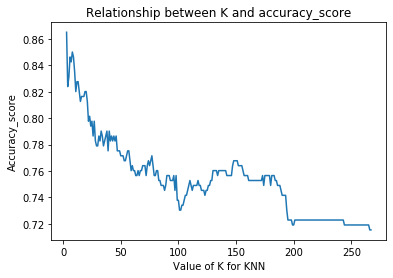

In [26]:
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and accuracy_score
plt.plot(k_range, scores)
plt.title('Relationship between K and accuracy_score')
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy_score')